In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [80]:
train = pd.read_csv('../data/train_xy.csv')

In [168]:
train.head()

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,0,0,0,0,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1


In [81]:
test = pd.read_csv('../data/train_x.csv')

In [82]:
iv_feature = ['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150', 'x_153', 'x_154', 'x_155', 'x_157']
x_train = train[iv_feature]
x_train.shape

(15000, 103)

In [83]:
iv_feature = ['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150', 'x_153', 'x_154', 'x_155', 'x_157']
x_test = test[iv_feature]
x_test.shape

(10000, 103)

iv_feature = ['x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55',
       'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63',
       'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71',
       'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79',
       'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87',
       'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139',
       'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150',
       'x_153', 'x_154', 'x_155', 'x_157']

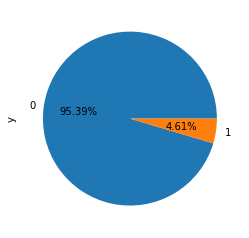

In [84]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [85]:
Y_train = train['y']

In [87]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 103)

In [88]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    if col in x.columns.values:
        dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
        x = pd.concat([x, dummies_df], axis=1)

In [89]:
x.shape

(25000, 170)

In [91]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 170)
(10000, 170)


In [92]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [93]:
X_train,X_val,y_train,y_val= train_test_split(train_X,Y_train,test_size=0.2,random_state=2)

In [94]:
def split_data(data_):
    idx_1 = data_[data_['label']==0].index
    idx_2 = data_[data_['label']==1].index
    nb_1 = len(data_.loc[idx_1])
    nb_2 = len(data_.loc[idx_2])
#     print(nb_1)
#     print(nb_2)
    idx_list_1 = list(idx_1)
    idx_list_2 = list(idx_2)
    train_x1 = data_.loc[idx_list_1]
    train_x2 = data_.loc[idx_list_2]
#     print(train_x1.shape)
#     print(train_x2.shape)
    return train_x1,train_x2

In [95]:
def resample_data(data, number):
    idx_1 = data.index
    nb_1 = len(idx_1)
#     print(nb_1)
#     number = int(nb_1 * rate)
    idx_1_sub = np.random.choice(idx_1, number)
#     print(idx_1_sub)
    nb_2 = len(data.loc[idx_1_sub])
#     print(nb_2)
    idx_list_1 = list(idx_1_sub)
    train_1 = data.loc[idx_1_sub]
#     print(train_1.shape)
    return train_1

In [96]:
def concat_data(train_x1, train_x2):
    train_data1 = train_x1.drop(['label'],axis =1)
    train_y1 = train_x1['label']
    
    train_data2 = train_x2.drop(['label'],axis =1)
    train_y2 = train_x2['label']
    
    train_data = train_data1.append(train_data2)
    train_y = train_y1.append(train_y2)
    
    return train_data, train_y

In [97]:
xx = X_train
xx['label'] = y_train

xx.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,...,x_1552,x_1553,x_157-99,x_1571,x_1572,x_1573,x_1574,x_15710,x_15711,label
1154,0,0,0,0,3,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9804,0,0,0,0,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7919,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,0,0,1,0,0,0,0,0,0,0
4854,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,1,0,1,0,0,0,0,0,0,0
5947,0,0,0,0,2,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [98]:
train_x1, train_x2 = split_data(xx)
print(train_x1.shape)
print(train_x2.shape)

(11442, 171)
(558, 171)


In [116]:
train_temp = resample_data(train_x1, 2000)

In [117]:
multi_x, multi_y= concat_data(train_temp, train_x2)

In [118]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, min_samples_split=3, min_samples_leaf=2, max_depth=4).fit(multi_x,multi_y)

In [123]:
predictions1 = gb.predict(X_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_val, predictions1, target_names=target_names))
val_auc = metrics.roc_auc_score(y_val,predictions1)#验证集上的auc值
print(val_auc)

             precision    recall  f1-score   support

    class 0       0.96      0.94      0.95      2867
    class 1       0.15      0.23      0.18       133

avg / total       0.93      0.91      0.92      3000

0.5827854428537335


In [127]:
np.sum(predictions)

270

In [105]:
np.sum(y_val)

133

In [121]:
gbm = XGBClassifier( n_estimators= 150, max_depth= 5, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                        colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(multi_x, multi_y)

In [122]:
predictions = gbm.predict(X_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_val, predictions, target_names=target_names))
val_auc = metrics.roc_auc_score(y_val,predictions)#验证集上的auc值
print(val_auc)

             precision    recall  f1-score   support

    class 0       0.97      0.92      0.94      2867
    class 1       0.14      0.29      0.19       133

avg / total       0.93      0.89      0.91      3000

0.6063305280991107


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [126]:
pred_sum_sum = predictions + predictions1
print(pred_sum_sum)
for i in range(3000):
    if pred_sum_sum[i] >= 1:
        pred_sum_sum[i] = 1
    else:
        pred_sum_sum[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val, pred_sum_sum, target_names=target_names))

val_acc = metrics.accuracy_score(y_val,pred_sum_sum)#验证集上的auc值
print(val_acc)
val_auc = metrics.roc_auc_score(y_val,predictions)#验证集上的auc值
print(val_auc)
print(np.sum(pred_sum_sum))

[0 0 0 ... 0 0 0]
             precision    recall  f1-score   support

    class 0       0.97      0.91      0.94      2867
    class 1       0.15      0.34      0.20       133

avg / total       0.93      0.88      0.90      3000

0.883
0.6063305280991107
308


In [128]:
pred_test1 = gb.predict(test_X)

In [129]:
pred_test = gbm.predict(test_X)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [155]:
pred_sum = pred_test1 + pred_test
for i in range(10000):
    if pred_sum[i] >= 1:
        pred_sum[i] = 1
    else:
        pred_sum[i] = 0

In [156]:
pred_sum.shape

(10000,)

In [157]:
np.max(pred_sum)

1

In [158]:
x.shape

(25000, 171)

In [159]:
x.head()

,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,...,x_1552,x_1553,x_157-99,x_1571,x_1572,x_1573,x_1574,x_15710,x_15711,y
0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,0,0,1,0,0,0,0,0,0,0
1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-99,-99,-99,-99,-99,-99,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [160]:
pred_sum_pd = pd.DataFrame(pred_sum)

In [161]:
y = Y_train.append(pred_sum_pd)
y.shape

(25000, 1)

In [162]:
x_train.shape

(15000, 103)

In [163]:
x_test.shape

(10000, 103)

In [164]:
xx = pd.concat([x_train,x_test])
xx.shape

(25000, 103)

In [165]:
xx['y'] = y

In [166]:
xx.shape

(25000, 104)

In [167]:
xx.to_csv('../data/train_xy_all.csv',index=False)